In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import coo_matrix, csr_matrix

In [ ]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 61.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import coo_matrix, csr_matrix
from implicit.als import AlternatingLeastSquares

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# Define file paths for each dataset
file_paths = ["actors.csv", "movies.csv", "genres.csv", "themes.csv"]

# Create a dictionary to store the dataframes
dataframes = {}

# Load each dataset and store it in the dictionary
for file_path in file_paths:
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "gsimonx37/letterboxd",
        file_path
    )
    dataframes[file_path.replace(".csv", "")] = df  # Store with filename as key

# Access the individual dataframes
actors_df = dataframes["actors"]
movies_df = dataframes["movies"]
genres_df = dataframes["genres"]
themes_df = dataframes["themes"]
#letterboxd_df = dataframes["letterboxd"]

# Print the first 5 records of each dataframe
print("Actors Dataframe:")
print(actors_df.head())
print("\nMovies Dataframe:")
print(movies_df.head())
print("\nGenre Dataframe:")
print(genres_df.head())
print("\nThemes Dataframe:")
print(themes_df.head())
print("Actors Dataframe:")

<ipython-input-6-924cc856a370>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 76.3M/76.3M [00:00<00:00, 94.5MB/s]

Extracting zip of actors.csv...



<ipython-input-6-924cc856a370>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 106M/106M [00:00<00:00, 170MB/s] 

Extracting zip of movies.csv...



<ipython-input-6-924cc856a370>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 3.04M/3.04M [00:00<00:00, 105MB/s]

Extracting zip of genres.csv...



<ipython-input-6-924cc856a370>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 502k/502k [00:00<00:00, 68.6MB/s]

Extracting zip of themes.csv...
Actors Dataframe:
        id               name    role
0  1000001      Margot Robbie  Barbie
1  1000001       Ryan Gosling     Ken
2  1000001    America Ferrera  Gloria
3  1000001  Ariana Greenblatt   Sasha
4  1000001           Issa Rae  Barbie

Movies Dataframe:
        id                               name    date  \
0  1000001                             Barbie  2023.0   
1  1000002                           Parasite  2019.0   
2  1000003  Everything Everywhere All at Once  2022.0   
3  1000004                         Fight Club  1999.0   
4  1000005                         La La Land  2016.0   

                                            tagline  \
0                  She's everything. He's just Ken.   
1                       Act like you own the place.   
2  The universe is so much bigger than you realize.   
3                           Mischief. Mayhem. Soap.   
4                    Here's to the fools who dream.   

                             

In [ ]:
# Load the CSVs into DataFrames
#movies_df = pd.read_csv('/content/drive/MyDrive/Algorithm For Massive DataSets - Moein Project/DataSets for massive data /movies.csv')
#genres_df = pd.read_csv('/content/drive/MyDrive/Algorithm For Massive DataSets - Moein Project/DataSets for massive data /genres.csv')
#themes_df = pd.read_csv('/content/drive/MyDrive/Algorithm For Massive DataSets - Moein Project/DataSets for massive data /themes.csv')
#actors_df = pd.read_csv('/content/drive/MyDrive/Algorithm For Massive DataSets - Moein Project/DataSets for massive data /actors.csv')

In [ ]:
movies_df.head()

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


In [ ]:
# Drop rows with missing values
movies_df.dropna(inplace=True)
genres_df.dropna(inplace=True)
themes_df.dropna(inplace=True)
actors_df.dropna(inplace=True)

In [ ]:
actors_df.head()

,id,name,role
0,1000001,Margot Robbie,Barbie
1,1000001,Ryan Gosling,Ken
2,1000001,America Ferrera,Gloria
3,1000001,Ariana Greenblatt,Sasha
4,1000001,Issa Rae,Barbie


In [ ]:
movies_df.head()

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


In [ ]:
genres_df.head()

,id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama


In [ ]:
themes_df.head()

,id,theme
0,1000001,Humanity and the world around us
1,1000001,Crude humor and satire
2,1000001,Moving relationship stories
3,1000001,Emotional and captivating fantasy storytelling
4,1000001,Surreal and thought-provoking visions of life ...


In [ ]:
# Merge datasets
df_combined = movies_df.merge(movies_df, on='id') \
                       .merge(themes_df, on='id') \
                       .merge(actors_df, on='id')

In [ ]:
print(df_combined.columns)

Index(['id', 'name_x', 'date_x', 'tagline_x', 'description_x', 'minute_x',
       'rating_x', 'name_y', 'date_y', 'tagline_y', 'description_y',
       'minute_y', 'rating_y', 'theme', 'name', 'role'],
      dtype='object')


In [ ]:
# 🔹 Step 1: Encode actors and movies
actor_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df_combined['actor_id'] = actor_encoder.fit_transform(df_combined['name'])
df_combined['movie_id'] = movie_encoder.fit_transform(df_combined['name_x'])

# 🔹 Step 2: Create sparse interaction matrix (actor-movie)
interaction_matrix = coo_matrix(
    ( [1]*len(df_combined), (df_combined['actor_id'], df_combined['movie_id']) )
)

# 🔹 Step 3: Convert to CSR format for training
interaction_csr = interaction_matrix.tocsr()

# 🔹 Step 4: Train ALS model (Alternating Least Squares)
model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20)
model.fit(interaction_csr)



/usr/local/lib/python3.11/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.preprocessing import LabelEncoder

class ALSRecommender:
    def __init__(self, factors=50, regularization=0.1, iterations=20):
        self.factors = factors
        self.regularization = regularization
        self.iterations = iterations

    def fit(self, interaction_matrix):
        self.interaction_matrix = interaction_matrix
        num_users, num_items = interaction_matrix.shape
        self.user_factors = np.random.rand(num_users, self.factors)
        self.item_factors = np.random.rand(num_items, self.factors)

        for _ in range(self.iterations):
            self._update_user_factors()
            self._update_item_factors()

    def _update_user_factors(self):
        for u in range(self.interaction_matrix.shape[0]):
            items_u = self.interaction_matrix[u].indices
            if len(items_u) > 0:
                A_u = self.item_factors[items_u].T @ self.item_factors[items_u]
                A_u += np.eye(self.factors) * self.regularization
                b_u = self.item_factors[items_u].T @ self.interaction_matrix[u, items_u].toarray().flatten()
                self.user_factors[u] = np.linalg.solve(A_u, b_u)

    def _update_item_factors(self):
        for i in range(self.interaction_matrix.shape[1]):
            users_i = self.interaction_matrix[:, i].indices
            if len(users_i) > 0:
                A_i = self.user_factors[users_i].T @ self.user_factors[users_i]
                A_i += np.eye(self.factors) * self.regularization
                b_i = self.user_factors[users_i].T @ self.interaction_matrix[users_i, i].toarray().flatten()
                self.item_factors[i] = np.linalg.solve(A_i, b_i)

    def recommend(self, user_id, user_interactions, N=10):
        scores = self.item_factors @ self.user_factors[user_id]
        known_items = user_interactions.indices
        scores[known_items] = -np.inf  # Exclude already interacted items
        top_item_indices = np.argpartition(scores, -N)[-N:]
        return top_item_indices, scores[top_item_indices]

In [ ]:
# 🔹 Step 5: Get top movie recommendations for a specific actor
actor_name = "Issa Rae"  # Example actor
actor_id = actor_encoder.transform([actor_name])[0]
recommendations = model.recommend(actor_id, interaction_csr[actor_id], N=10)

In [ ]:
# 🔹 Step 6: Decode movie IDs back to titles
print(f"\nTop movie recommendations for {actor_name}:")
for movie_id, score in zip(recommendations[0], recommendations[1]):  # Access elements using indexing
    movie_title = movie_encoder.inverse_transform([movie_id])[0]
    print(f"{movie_title} → score: {score:.2f}")


Top movie recommendations for Issa Rae:
Rocketman → score: 0.31
Cinderella → score: 0.19
Beauty and the Beast → score: 0.18
22 Jump Street → score: 0.16
Fantastic Four → score: 0.16
Eurovision Song Contest: The Story of Fire Saga → score: 0.15
Renfield → score: 0.15
Hot Pursuit → score: 0.15
The Tomorrow War → score: 0.15
Ant-Man and the Wasp → score: 0.13


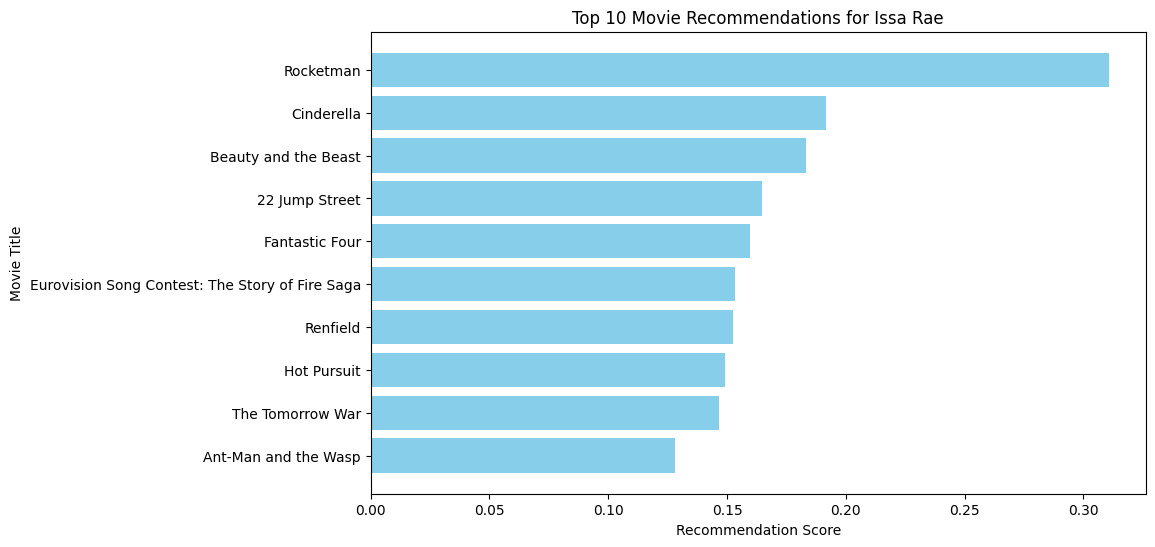

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'recommendations' is already defined as in the previous code
actor_name = "Issa Rae"
recommendations = model.recommend(actor_id, interaction_csr[actor_id], N=10)

movie_titles = [movie_encoder.inverse_transform([movie_id])[0] for movie_id in recommendations[0]]
scores = recommendations[1]

plt.figure(figsize=(10, 6))
plt.barh(movie_titles, scores, color='skyblue')
plt.xlabel("Recommendation Score")
plt.ylabel("Movie Title")
plt.title(f"Top 10 Movie Recommendations for {actor_name}")
plt.gca().invert_yaxis()  # Invert y-axis to show highest score at the top
plt.show()


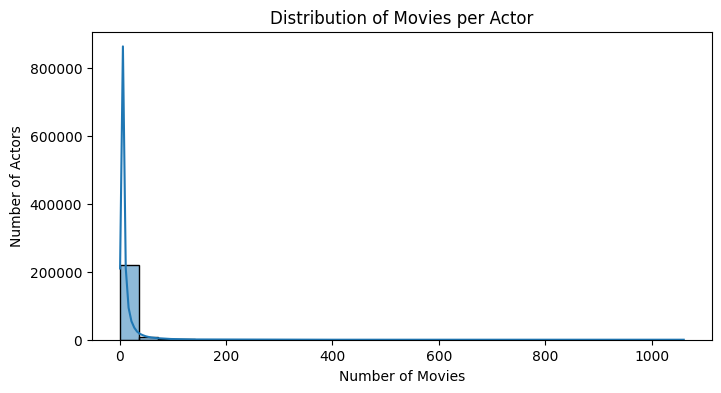

In [ ]:
# Count the number of movies per actor
movie_counts = df_combined.groupby('name')['name_x'].count()

# Create the visualization
plt.figure(figsize=(8, 4))
sns.histplot(movie_counts, bins=30, kde=True)
plt.title('Distribution of Movies per Actor')
plt.xlabel('Number of Movies')
plt.ylabel('Number of Actors')
plt.show()


In [ ]:
# Set a consistent style
sns.set(style="whitegrid")

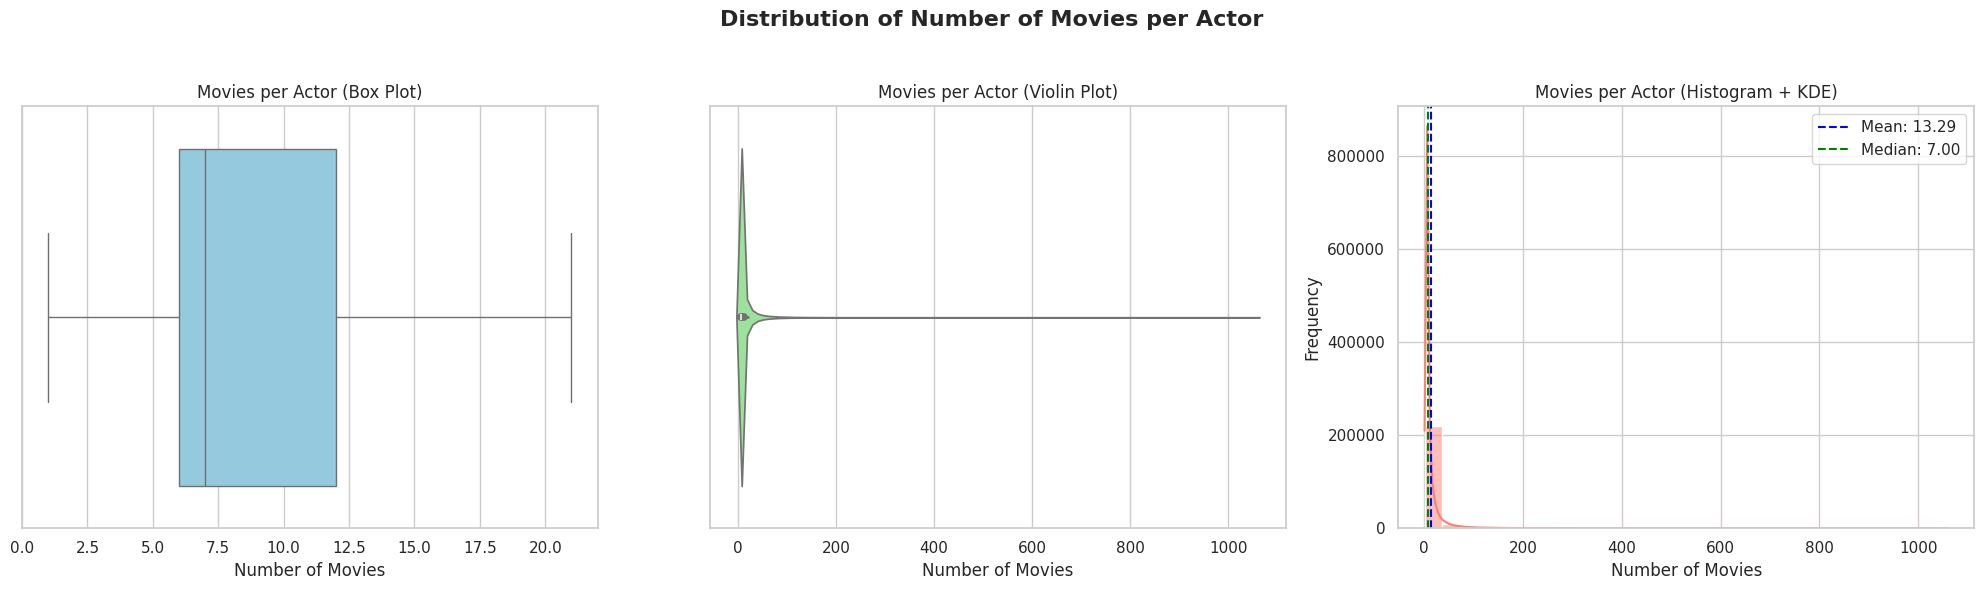

In [ ]:
def plot_movies_per_actor(df):
    # Count the number of movies per actor
    movie_counts = df.groupby('name')['name_x'].count().reset_index(name='movie_count')

    # Summary statistics
    mean_val = movie_counts['movie_count'].mean()
    median_val = movie_counts['movie_count'].median()
    max_val = movie_counts['movie_count'].max()

    # Set style
    sns.set(style="whitegrid")

    # Create the visualization
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

    # Box Plot
    sns.boxplot(x='movie_count', data=movie_counts, ax=axes[0], showfliers=False, color='skyblue')
    axes[0].set_title('Movies per Actor (Box Plot)')
    axes[0].set_xlabel('Number of Movies')

    # Violin Plot
    sns.violinplot(x='movie_count', data=movie_counts, ax=axes[1], color='lightgreen')
    axes[1].set_title('Movies per Actor (Violin Plot)')
    axes[1].set_xlabel('Number of Movies')

    # Histogram with KDE
    sns.histplot(movie_counts['movie_count'], kde=True, ax=axes[2], color='salmon', bins=30)
    axes[2].axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[2].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[2].set_title('Movies per Actor (Histogram + KDE)')
    axes[2].set_xlabel('Number of Movies')
    axes[2].set_ylabel('Frequency')
    axes[2].legend()

    # Adjust layout and display
    plt.suptitle('Distribution of Number of Movies per Actor', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_movies_per_actor(df_combined)


<ipython-input-24-d299de1d491a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_actors.index, y=top_3_actors.values, palette="viridis")


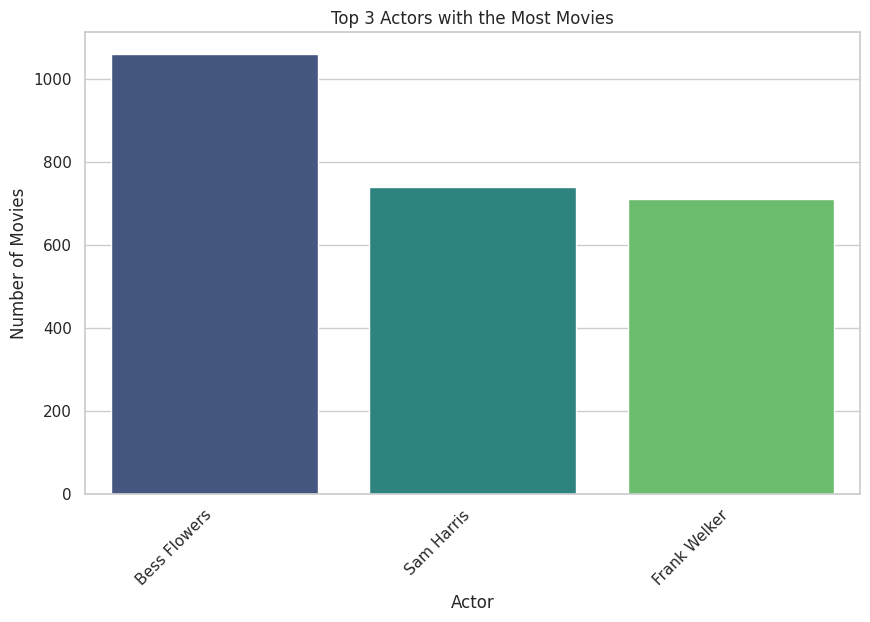

In [ ]:
def plot_top_3_actors(df):

    # Count the number of movies per actor and sort
    movie_counts = df.groupby('name')['name_x'].count().sort_values(ascending=False)

    # Select the top 3 actors
    top_3_actors = movie_counts.head(3)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_3_actors.index, y=top_3_actors.values, palette="viridis")
    plt.title('Top 3 Actors with the Most Movies')
    plt.xlabel('Actor')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


plot_top_3_actors(df_combined)

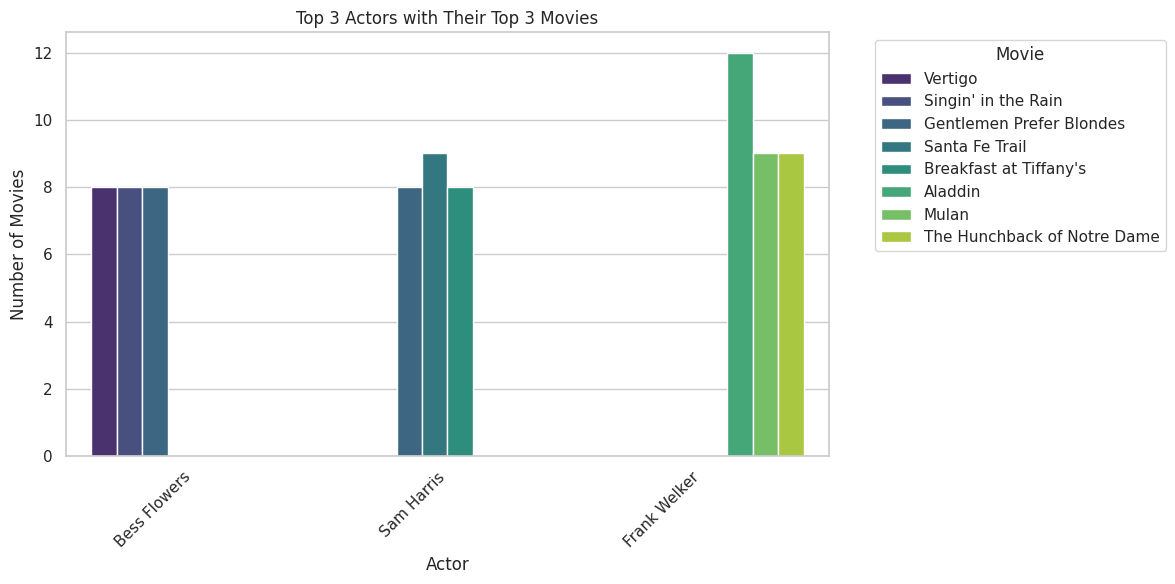

In [ ]:
def plot_top_3_actors_with_movies(df):

    # Get top 3 actors
    top_3_actors = df.groupby('name')['name_x'].count().nlargest(3).index

    # Get top 3 movies for each actor
    actor_movie_counts = []
    for actor in top_3_actors:
        top_movies = df[df['name'] == actor]['name_x'].value_counts().nlargest(3)
        for movie, count in top_movies.items():
            actor_movie_counts.append([actor, movie, count])

    # Create DataFrame for plotting
    plot_df = pd.DataFrame(actor_movie_counts, columns=['Actor', 'Movie', 'Count'])

    # Create the grouped bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Actor', y='Count', hue='Movie', data=plot_df, palette='viridis')
    plt.title('Top 3 Actors with Their Top 3 Movies')
    plt.xlabel('Actor')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Movie', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


plot_top_3_actors_with_movies(df_combined)